# 🤔 **MediaPipe Objectron:**
* ### This is a real-time 3D object detection solution for everyday objects. It is trained on a dataset of over 10 million images and can detect objects in a variety of lighting conditions.
* ### Currently it can detect this many classes: bike 🚲, book 📗, bottle 🍼, camera 📷, cereal_box ⌧, chair 🪑 , cup 🥤, laptop 💻, shoe 👟
 
# 🤓 **Applications:**
* ### Augmented-Reality 🥽, Robotics 🤖, Self-Driving Vehicles 🚘 and Image Retrieval

# 😌 **Simple Implementation 👇👇👇**

In [ ]:
import cv2
import mediapipe as mp
import time

mp_objectron = mp.solutions.objectron       # for 3d object detection
mp_drawing = mp.solutions.drawing_utils     # for drawing 3d bounding boxes

cap = cv2.VideoCapture(0)
cv2.namedWindow("Mediapipe Objectron", cv2.WINDOW_NORMAL)
window_width = 1080
window_height = 720
cv2.resizeWindow("Mediapipe Objectron", window_width, window_height)

with mp_objectron.Objectron(static_image_mode=False,    # because we're going to work with video
                            max_num_objects=2,
                            min_detection_confidence=0.5,
                            min_tracking_confidence=0.8,
                            model_name="Cup") as objectron:
    while cap.isOpened():
        success, image = cap.read()

        start = time.time()

        # Convert BGR image to RGB as mediapipe solutions work with RGB image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # To improve performance, optionally mark the image as not writeable to pass by reference
        image.flags.writeable = False
        results = objectron.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.detected_objects:
            for detected_object in results.detected_objects:
                mp_drawing.draw_landmarks(image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
                mp_drawing.draw_axis(image, detected_object.rotation, detected_object.translation)

        end = time.time()
        totalTime = end - start

        fps = 1 / totalTime

        cv2.putText(image, f"FPS: {int(fps)}", (20, 70), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (1, 50, 32), 2)

        cv2.imshow("Mediapipe Objectron", image)

        if cv2.waitKey(50) == 27:
            break

cap.release()
cv2.destroyAllWindows()

# 👉 **Output:** 
### Cup Detected having 3D Bounding Boxes

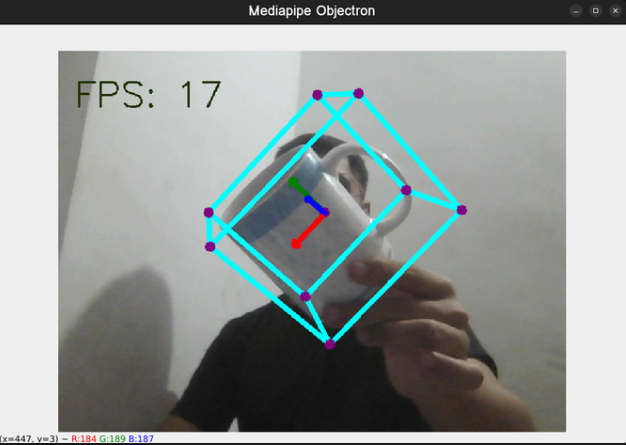